First of all we will do a model exploration in a base case (no policies implemented); <br/>
Next we will do a model exploration with random policies; <br/>
after a sensitivity and vulnerability analysis will be done; <br/>
at last a Optimization will be run to find optimal solutions. <br/>

# 1. Model exploration

In [17]:
# initialize for this run
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter, Policy
from SALib.analyze import sobol

from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import dimensional_stacking
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties

from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework import sample_uncertainties
from ema_workbench.em_framework.evaluators import BaseEvaluator

from dike_model_function import DikeNetwork

from ProblemFormulationSelf import problem_definition

from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [43]:
# Define an aggregation functions for further use
def agg(df,name_list):
    for i in name_list:
        list = df.filter(like = i).columns
        df['total'+ i] = df[list].sum(axis=1)
        df.drop(columns = list, inplace = True)
    return df    

## 1.1 Base case: No policy 

In [3]:
dike_model, planning_steps = problem_definition('all vars')

policies_0 = [Policy('no policy', **{l.name: 0 for l in dike_model.levers})]
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_0 = evaluator.perform_experiments(scenarios = 1000, policies = policies_0)

save_results(all_results_0, './data/exp/nopol1000scen.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz


In [3]:
# Ensure variable is defined
try:
    all_results_0
except NameError:
    all_results_0 = None

# Test whether variable is defined to be None
if all_results_0 is None:
    all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
    experiments_0, outcomes_0 = all_results_0


[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\EPA1361-Model-based Decison Making\EPA1361\final assignment\data\exp\nopol1000scen.tar.gz


In [15]:
#all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
# experiments_0, outcomes_0 = all_results_0

### Plot the outcomes from no policy scenarios 

Because the outcomes are too disaggregated to be plotted, the outcomes are aggregated into different catagories

##### @ Martjin, I wrote the following codes into a function (because they are frequently used in our analysis), this makes our codes concise

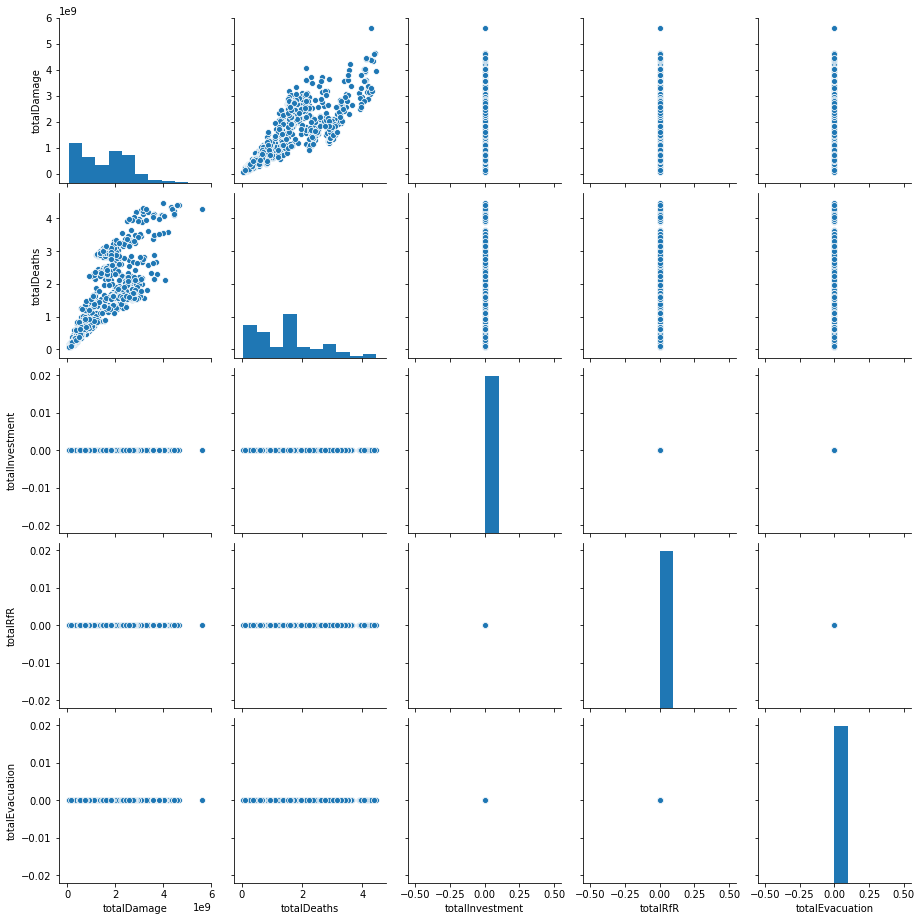

In [49]:
data = pd.DataFrame.from_dict(outcomes_0)

dam_list = ['Damage','Deaths','Investment','RfR','Evacuation']
data = agg(data, dam_list)

#dam_list = data.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
#data['total-damage'] = data[dam_list].sum(axis=1)
#data.drop(columns=dam_list, inplace=True)
#death_list = data.filter(like='Deaths').columns
#data['total-death'] = data[death_list].sum(axis=1)
#data.drop(columns=death_list, inplace=True)
#invest_list = data.filter(like='Investment').columns
#data['total-investment'] = data[invest_list].sum(axis=1)
#data.drop(columns=invest_list, inplace=True)
#rfr_list = data.filter(like='RfR').columns
#data['total-RfR'] = data[rfr_list].sum(axis=1)
#data.drop(columns=rfr_list, inplace=True)
#evac_list = data.filter(like='Evacuation').columns
#data['total-evacuation'] = data[evac_list].sum(axis=1)
#data.drop(columns=evac_list, inplace=True)

# new_outcomes = {col:np.array(data[col].tolist()) for col in data.columns} 
# print(data.head())

sns.pairplot(data, vars=list(data.columns), diag_kind='hist')
plt.show()

Since there is no policy being implemented, "total-investment", "total-RFR" and "total-evacuation" are zero. And we take a closer look at the damages and deaths

Text(0.5, 1.0, 'Distribution of total death')

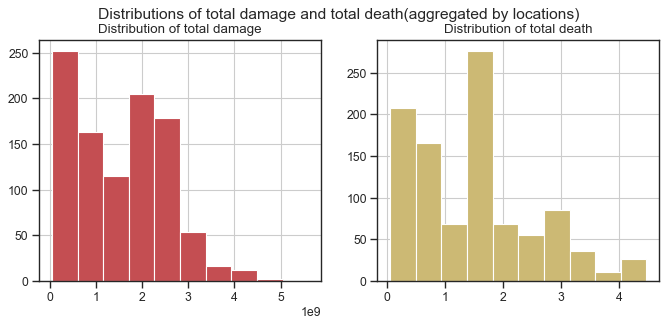

In [98]:
plt.figure(figsize=(10,4), dpi=80)
plt.suptitle('Distributions of total damage and total death(aggregated by locations)', fontsize=14)

plt.figure(1)
ax1 = plt.subplot(121)
data['total-damage'].hist(color="r")
plt.title('Distribution of total damage')

ax2 = plt.subplot(122)
data['total-death'].hist(color="y")
plt.title('Distribution of total death')

#### Expected Damage

In [106]:
outcome_damage = pd.DataFrame.from_dict(outcomes_0)

damage1 = outcome_damage.filter(like='A.1_Expected Annual Damage').columns
outcome_damage['Total Damage of A1'] = outcome_damage[damage1].sum(axis=1) # To agregate the location by time

damage2 = outcome_damage.filter(like='A.2_Expected Annual Damage').columns
outcome_damage['Total Damage of A2'] = outcome_damage[damage2].sum(axis=1)

damage3 = outcome_damage.filter(like='A.3_Expected Annual Damage').columns
outcome_damage['Total Damage of A3'] = outcome_damage[damage3].sum(axis=1)

damage4 = outcome_damage.filter(like='A.4_Expected Annual Damage').columns
outcome_damage['Total Damage of A4'] = outcome_damage[damage4].sum(axis=1)


damage5 = outcome_damage.filter(like='A.5_Expected Annual Damage').columns
outcome_damage['Total Damage of A5'] = outcome_damage[damage5].sum(axis=1)

outcome_damage = outcome_damage.loc[:,['Total Damage of A1','Total Damage of A2','Total Damage of A3','Total Damage of A4','Total Damage of A5']]

Text(0.5, 1.0, 'Expected annual damage at each location')

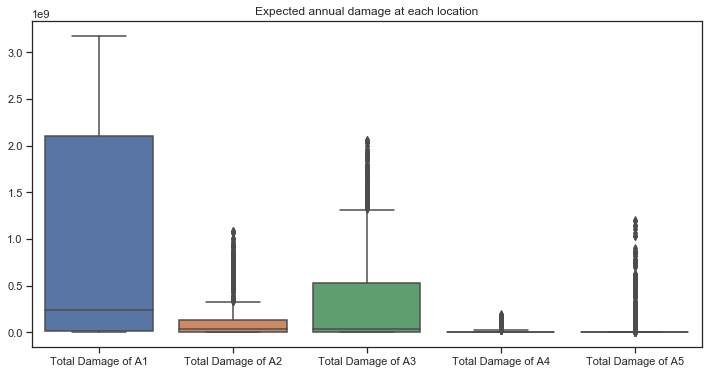

In [110]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data = outcome_damage)
ax.set_title('Expected annual damage at each location')

### Expected death

In [99]:
outcome_death = pd.DataFrame.from_dict(outcomes_0)

In [100]:
death1 = outcome_death.filter(like='A.1_Expected Number of Deaths').columns
# print(data.filter(like='Damage').columns)
outcome_death['Total Death of A1'] = outcome_death[death1].sum(axis=1) # To agregate the location by time

death2 = outcome_death.filter(like='A.2_Expected Number of Deaths').columns
# print(data.filter(like='Damage').columns)
outcome_death['Total Death of A2'] = outcome_death[death2].sum(axis=1) # To agregate the location by time

death3 = outcome_death.filter(like='A.3_Expected Number of Deaths').columns
# print(data.filter(like='Damage').columns)
outcome_death['Total Death of A3'] = outcome_death[death3].sum(axis=1) # To agregate the location by time

death4 = outcome_death.filter(like='A.4_Expected Number of Deaths').columns
# print(data.filter(like='Damage').columns)
outcome_death['Total Death of A4'] = outcome_death[death4].sum(axis=1) # To agregate the location by time

death5 = outcome_death.filter(like='A.5_Expected Number of Deaths').columns
# print(data.filter(like='Damage').columns)
outcome_death['Total Death of A5'] = outcome_death[death5].sum(axis=1) # To agregate the location by time

outcome_death = outcome_death.loc[:,['Total Death of A1','Total Death of A2','Total Death of A3','Total Death of A4','Total Death of A5']]

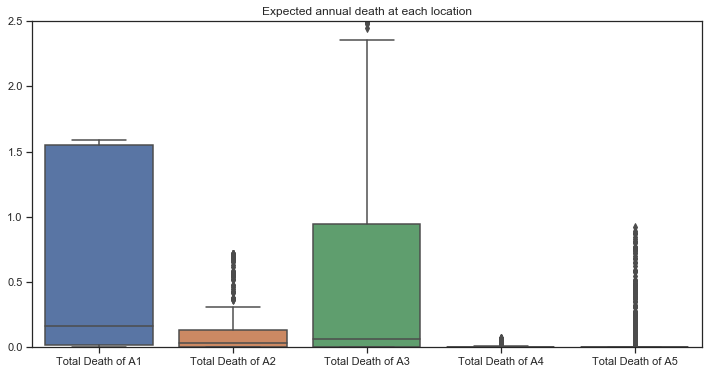

In [105]:
plt.figure(figsize=(12, 6))
ax_death = sns.boxplot(data = outcome_death)
ax_death.set_title('Expected annual death at each location')
ax_death.set_ybound(0, 2.5)

## 1.2 Ten random policies

run with 10 ramdom policies

In [9]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_r10 = evaluator.perform_experiments(scenarios=10000,               #500
                                            policies=10,
                                            uncertainty_sampling='mc', reporting_interval=10000)

from ema_workbench import save_results

save_results(all_results_r10, './data/exp/mc10pol10000scen.tar.gz')

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.094582e+07,0.038356,2.727952e+07,0.027808,1.742046e+07,0.033337,1.054218e+07,0.005985,2.406315e+08,0.227915,0.0,0.0
1,2.195438e+08,0.125752,8.626318e+07,0.065485,5.439873e+07,0.079584,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
2,6.579547e+06,0.006079,4.313936e+08,0.480962,5.851649e+08,1.263215,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
3,2.205500e+09,1.726188,0.000000e+00,0.000000,7.482219e+07,0.147622,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
4,8.789173e+07,0.093068,8.718292e+07,0.120338,3.829385e+07,0.101135,0.000000e+00,0.000000,5.967699e+08,0.769028,0.0,0.0


In [22]:
try:
    all_results_r10
except NameError:
    all_results_r10 = None

# Test whether variable is defined to be None
if all_results_10 is None:
    all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
    experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/mc10pol10000scen.tar.gz


In [76]:
# all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
# experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\EPA1361-Model-based Decison Making\EPA1361\final assignment\data\exp\mc10pol10000scen.tar.gz


In [77]:
data_r10 = pd.DataFrame.from_dict(outcomes_r10)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Investment').columns
data_r10['total-investment'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)
rfr_list = data_r10.filter(like='RfR').columns
data_r10['total-RfR'] = data_r10[rfr_list].sum(axis=1)
data_r10.drop(columns=rfr_list, inplace=True)
evac_list = data_r10.filter(like='Evacuation').columns
data_r10['total-evacuation'] = data_r10[evac_list].sum(axis=1)
data_r10.drop(columns=evac_list, inplace=True)


[MainProcess/INFO] no time dimension found in results


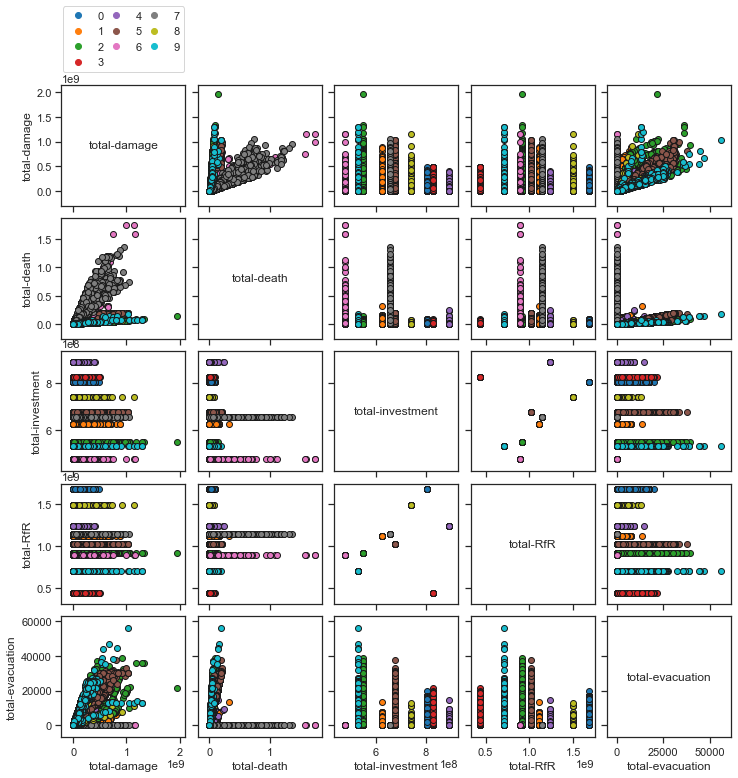

In [82]:
# TODO @Hongxuan please see this weird as problem. You have to run an empty cell to make it show something ;PPP
# @Martijn, I didn't run the empty cell below but I still got the figure (but it took some time )
from ema_workbench.analysis import pairs_plotting

new_outcomes_r10 = {col:np.array(data_r10[col].tolist()) for col in data_r10.columns}

fig, ax = pairs_plotting.pairs_scatter(experiments_r10, new_outcomes_r10, group_by='policy', legend=True)
fig.set_size_inches([12, 12])

Text(0.5, 1.0, 'Distribution of evacuation cost')

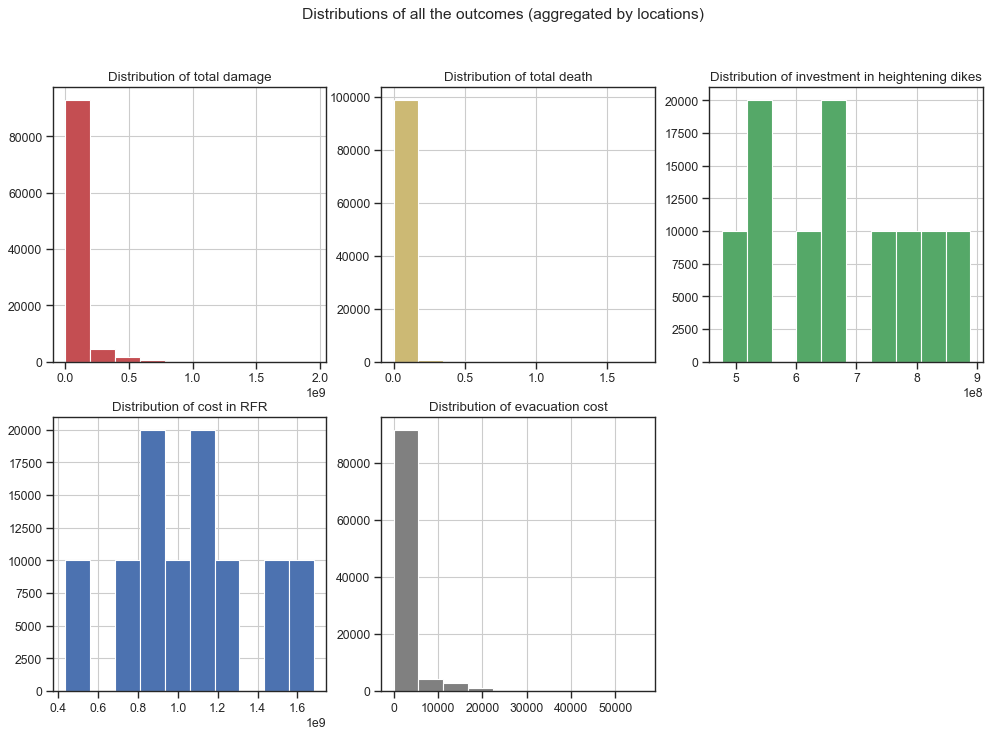

In [115]:
# Add some titles for the figures

import matplotlib.pyplot as plt # TO DO; plot the scalers.

plt.figure(figsize=(15,10), dpi=80)
plt.suptitle('Distributions of all the outcomes (aggregated by locations)', fontsize=14)
plt.figure(1)
ax1 = plt.subplot(231)
data_r10['total-damage'].hist(color="r")
plt.title('Distribution of total damage')

ax2 = plt.subplot(232)
data_r10['total-death'].hist(color="y")
plt.title('Distribution of total death')

ax3 = plt.subplot(233)
data_r10['total-investment'].hist(color="g")
plt.title('Distribution of investment in heightening dikes')

ax4 = plt.subplot(234)
data_r10['total-RfR'].hist(color="b")
plt.title('Distribution of cost in RFR')

ax5 = plt.subplot(235)
data_r10['total-evacuation'].hist(color="grey")
plt.title('Distribution of evacuation cost')


Compared the distributions of total damage/death of 10 polices and those of no policy, we can clearly find the damages and casualties are ruduced by these policies 

# 2. Vulnerability & sensitivity Analysis

### scenario discovery


In [4]:
# Ensure variable is defined
try:
    all_results_0
except NameError:
    all_results_0 = None

# Test whether variable is defined to be None
if all_results_0 is None:
    all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
    experiments_0, outcomes_0 = all_results_0

try:
    all_results_r10
except NameError:
    all_results_r10 = None

# Test whether variable is defined to be None
if all_results_r10 is None:
    all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
    experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz
[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/mc10pol10000scen.tar.gz


In [6]:
data_0 = pd.DataFrame.from_dict(outcomes_0)

dam_list = data_0.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_0['total-damage'] = data_0[dam_list].sum(axis=1)
data_0.drop(columns=dam_list, inplace=True)
death_list = data_0.filter(like='Deaths').columns
data_0['total-death'] = data_0[death_list].sum(axis=1)
data_0.drop(columns=death_list, inplace=True)
invest_list = data_0.filter(like='Costs').columns
data_0.drop(columns=invest_list, inplace=True)


data_r10 = pd.DataFrame.from_dict(outcomes_r10)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Costs').columns
data_r10['total-cost'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)

In [4]:
print("total deahts no pols mean: "+str(data_0['total-death'].mean()))
print("total damage no pols mean: "+str(data_0['total-damage'].mean()))
print("total deaths 10 random pols mean: "+str(data_r10['total-death'].mean()))
print("total damage 10 random pols mean: "+str(data_r10['total-damage'].mean()))
print("total costs 10 random pols mean: "+str(data_r10['total-cost'].mean()))

print("total deaths no pols greater than 1: "+str(np.sum(data_0['total-death']>1)))
print("total damage no pols greater than 1B: "+str(np.sum(data_0['total-damage']>1000000000)))
print("total deaths 10 random pols greater than 0.05: "+str(np.sum(data_r10['total-death']>0.001)))
print("total damage 10 random pols greater than 1B: "+str(np.sum(data_r10['total-damage']>4000000)))
print("total cost 10 random pols greater than 1.6B: "+str(np.sum(data_r10['total-cost']>1600000000)))

total deahts no pols mean: 1.4966618578082576
total damage no pols mean: 1538255217.3632505
total deaths 10 random pols mean: 0.01616832650721995
total damage 10 random pols mean: 46749830.328865625
total costs 10 random pols mean: 1742717452.0047443
total deaths no pols greater than 1: 622
total damage no pols greater than 1B: 616
total deaths 10 random pols greater than 0.05: 57986
total damage 10 random pols greater than 1B: 59689
total cost 10 random pols greater than 1.6B: 60000


In [119]:
x_0 =  experiments_0.iloc[:, 0: 48]
y_death_0 = data_0['total-death'] > 1
y_damage_0 = data_0['total-damage']>1000000000

x_r10 =  experiments_r10.iloc[:, 0: 48]
y_death_r10 = data_r10['total-death'] > 0.001
y_damage_r10 = data_r10['total-damage']>4000000
y_cost_r10 = data_r10['total-cost']>1600000000

### Total death < 1 
##### (Need to motivate why this thrshold is chosen)

[MainProcess/INFO] 1000 points remaining, containing 622 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.28, coverage: 0.45016077170418006, density: 1.0 restricted_dimensions: 2


<function matplotlib.pyplot.show(*args, **kw)>

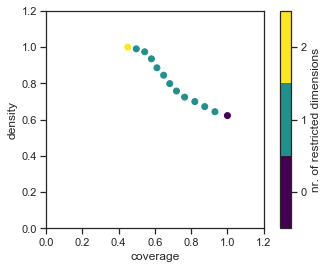

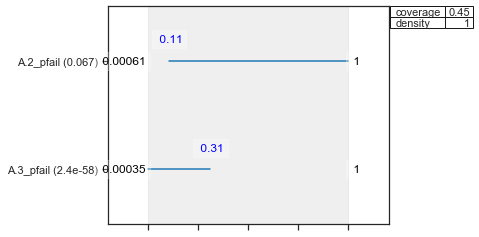

In [120]:
prim_death_0 = prim.Prim(x_0, y_death_0, threshold=0.3, peel_alpha=0.1)
box_death_0 = prim_death_0.find_box()

box_death_0.show_tradeoff()
box_death_0.inspect(style='graph')

plt.show

In [122]:
box_death_0.inspect_tradeoff()

alt.VConcatChart(...)

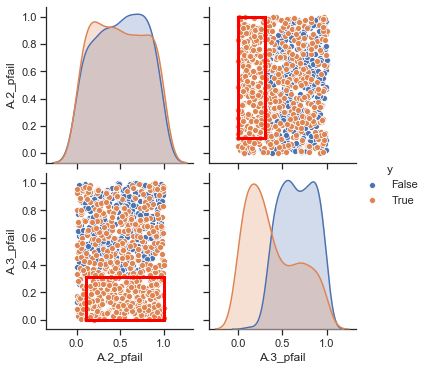

In [123]:
box_death_0.show_pairs_scatter()
plt.show()

#### Total damage > 1 billion

[MainProcess/INFO] 1000 points remaining, containing 616 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.386, coverage: 0.6266233766233766, density: 1.0 restricted_dimensions: 1


<function matplotlib.pyplot.show(*args, **kw)>

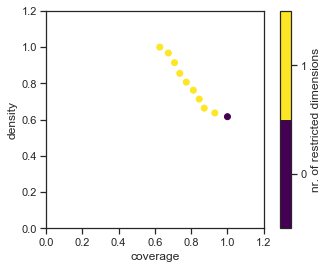

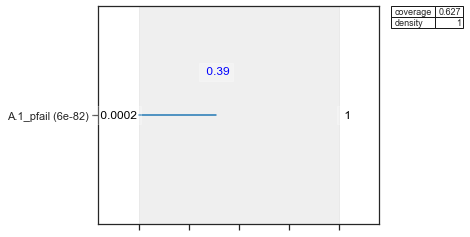

In [124]:
prim_damage_0 = prim.Prim(x_0, y_damage_0, threshold=0.3, peel_alpha=0.1)
box_damage_0 = prim_damage_0.find_box()

box_damage_0.show_tradeoff()
box_damage_0.inspect(style='graph')

plt.show

In [125]:
box_damage_0.inspect_tradeoff()

alt.VConcatChart(...)

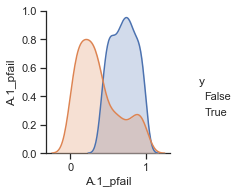

In [126]:
box_damage_0.show_pairs_scatter()
plt.show()

#### Death > 1  (10 policies)

[MainProcess/INFO] 100000 points remaining, containing 57986 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0846, coverage: 0.14589728555168488, density: 1.0 restricted_dimensions: 7


<function matplotlib.pyplot.show(*args, **kw)>

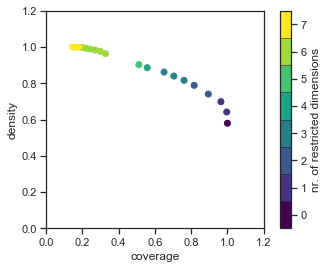

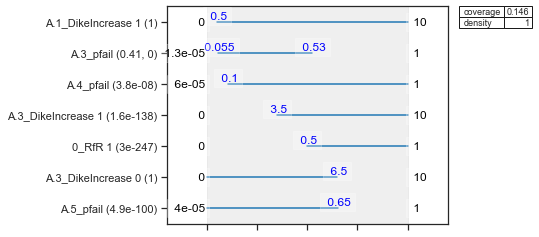

In [127]:
prim_death_r10 = prim.Prim(x_r10, y_death_r10, threshold=0.3, peel_alpha=0.1)
box_death_r10 = prim_death_r10.find_box()

box_death_r10.show_tradeoff()
box_death_r10.inspect(style='graph')

plt.show

In [128]:
box_death_r10.inspect_tradeoff()

alt.VConcatChart(...)

C:\Users\teres\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


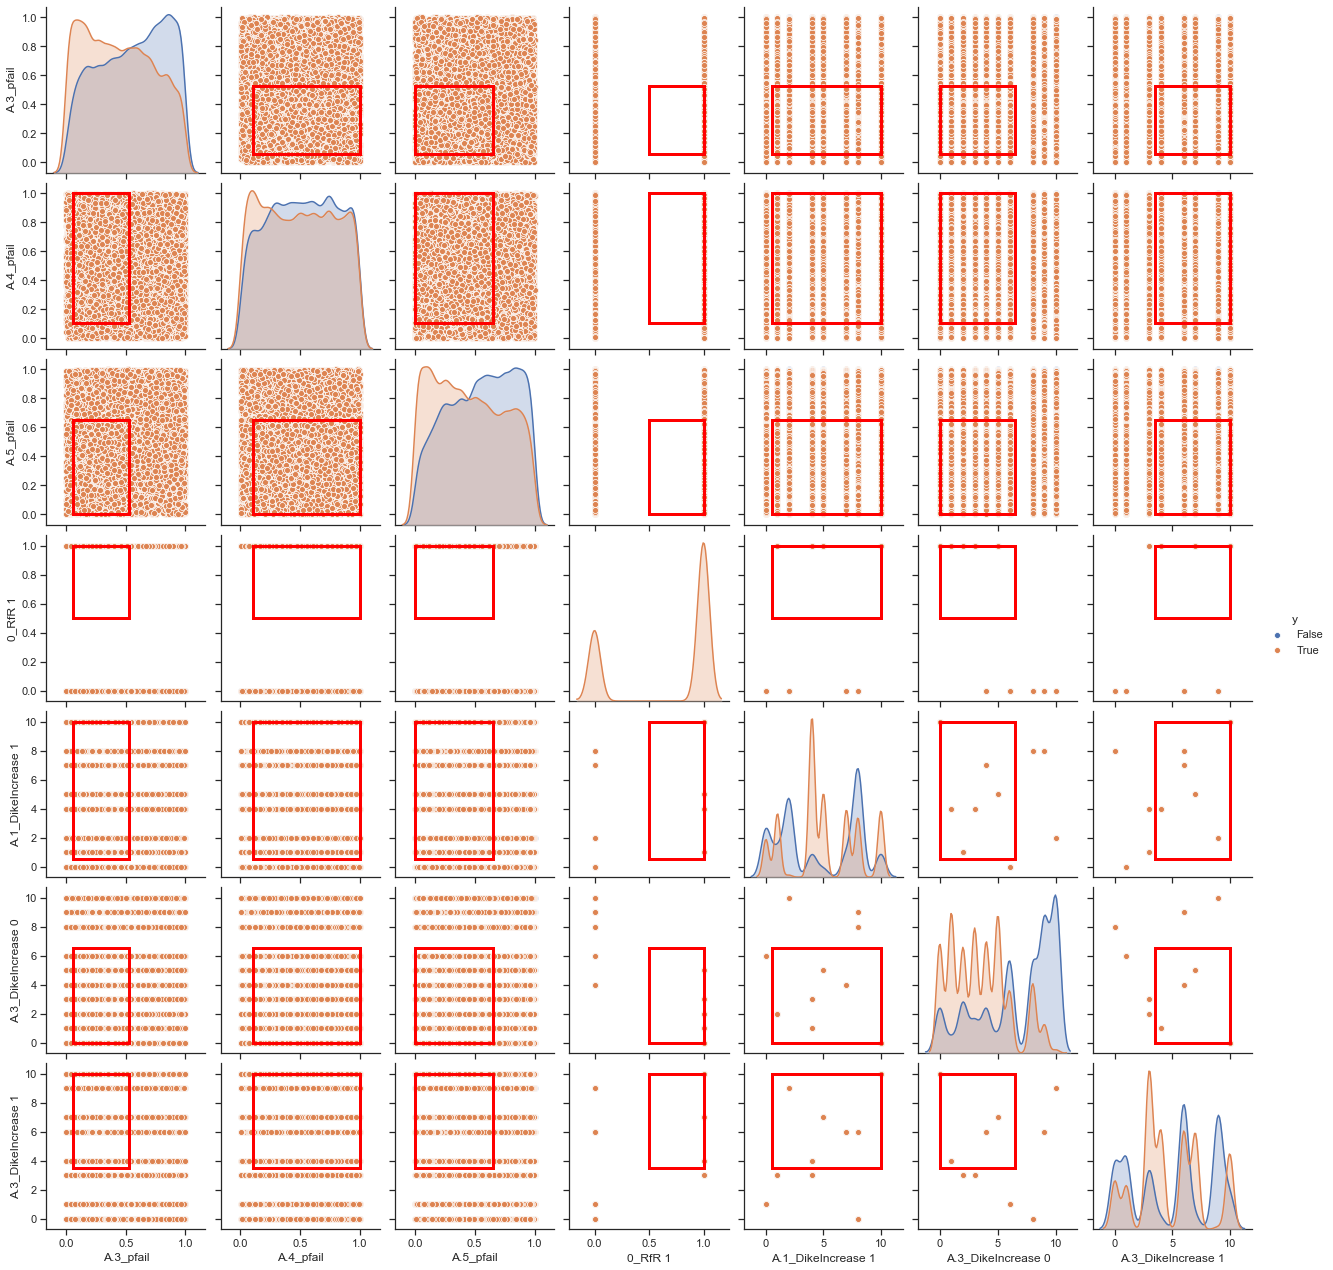

In [129]:
box_death_r10.show_pairs_scatter()
plt.show()

#### Total damage > 1 billion (10 policies)

[MainProcess/INFO] 100000 points remaining, containing 59689 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.06165, coverage: 0.10328536246209519, density: 1.0 restricted_dimensions: 5


<function matplotlib.pyplot.show(*args, **kw)>

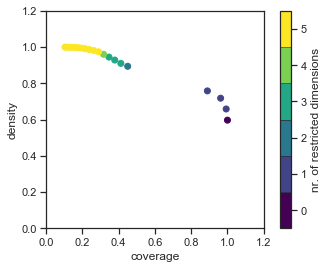

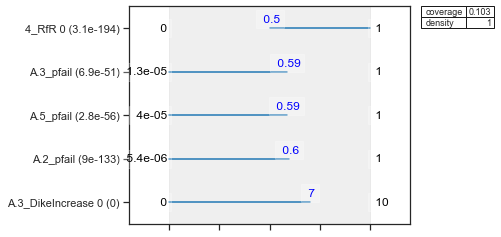

In [130]:
prim_damage_r10 = prim.Prim(x_r10, y_damage_r10, threshold=0.3, peel_alpha=0.1)
box_damage_r10 = prim_damage_r10.find_box()

box_damage_r10.show_tradeoff()
box_damage_r10.inspect(style='graph')

plt.show

In [131]:
box_damage_r10.inspect_tradeoff()

alt.VConcatChart(...)

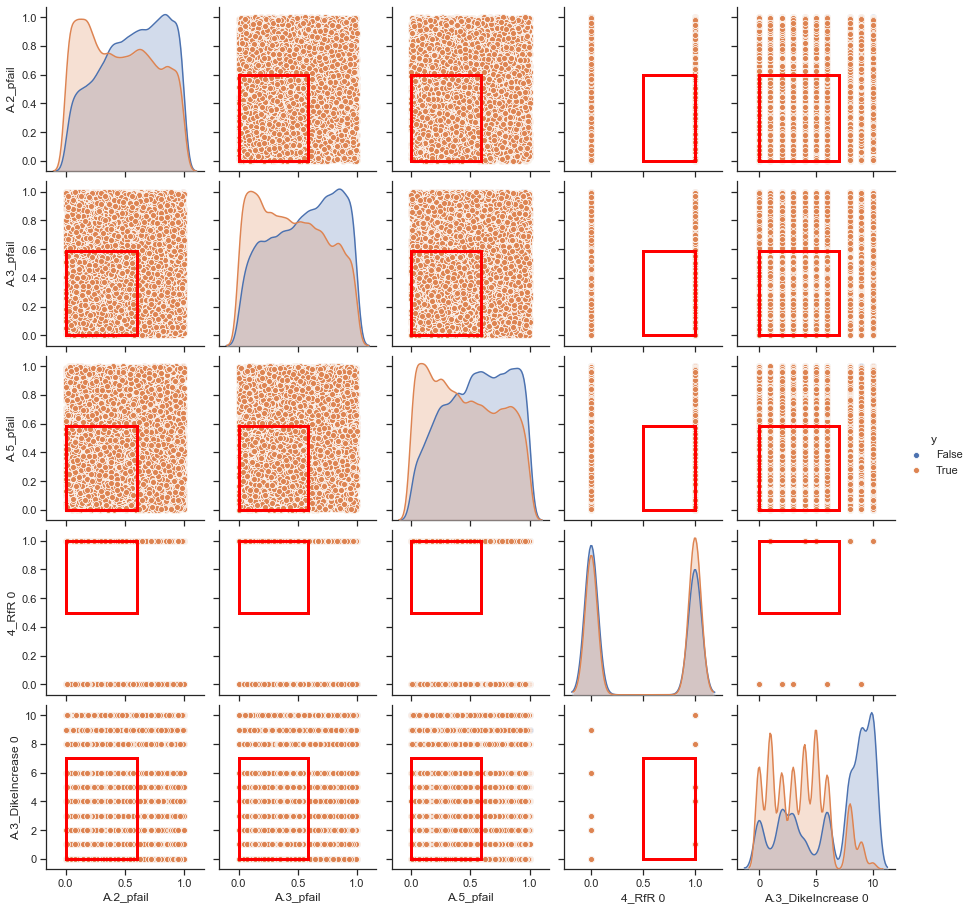

In [132]:
box_damage_r10.show_pairs_scatter()
plt.show()

#### Cost

[MainProcess/INFO] 100000 points remaining, containing 60000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.5, coverage: 0.8333333333333334, density: 1.0 restricted_dimensions: 1


<function matplotlib.pyplot.show(*args, **kw)>

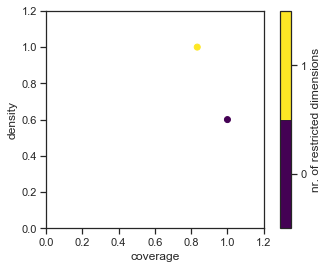

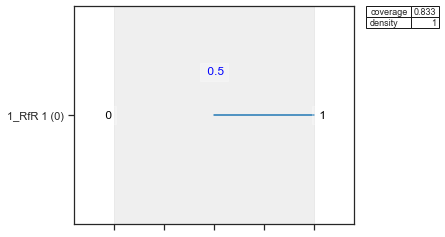

In [133]:
prim_cost_r10 = prim.Prim(x_r10, y_cost_r10, threshold=0.3, peel_alpha=0.1)
box_cost_r10 = prim_cost_r10.find_box()

box_cost_r10.show_tradeoff()
box_cost_r10.inspect(style='graph')

plt.show

In [134]:
box_cost_r10.inspect_tradeoff()

alt.VConcatChart(...)

C:\Users\teres\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\teres\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


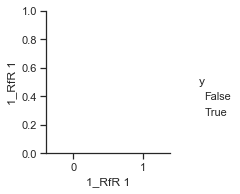

In [135]:
box_cost_r10.show_pairs_scatter()
plt.show()

### Feature Scoring
##### Feature scoring is used here to show how these levers/uncertainty factors influence the outcomes ( expected damage, expected total death and expected total cost)

In [7]:
x_0 = experiments_0.drop(['scenario','policy'], axis = 1, inplace = False)
x_r10 = experiments_r10.drop(['scenario'], axis = 1, inplace = False)


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


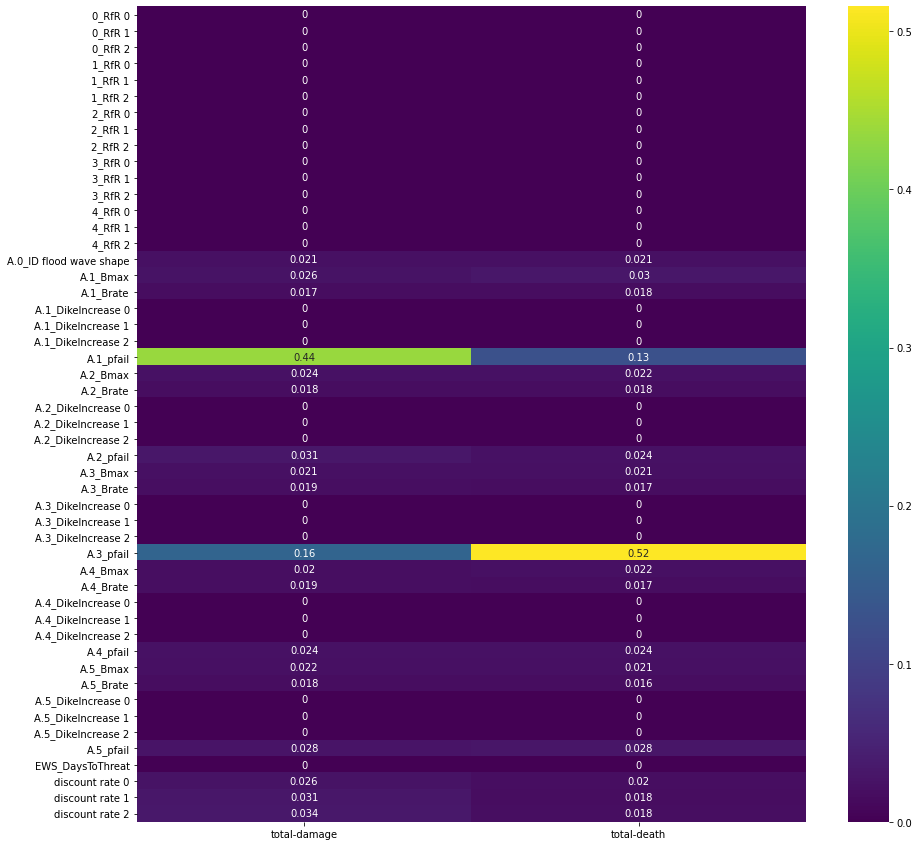

In [8]:
fs_0 = feature_scoring.get_feature_scores_all(x_0, data_0)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(fs_0, cmap='viridis', annot=True)
plt.show()

##### @ Martijn, do we have to do feature scoring to no-policy case as well? Orwe can only focus on the 10-random-policies case? Or we should do feature scoring for Overijssel-related outcomes?

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


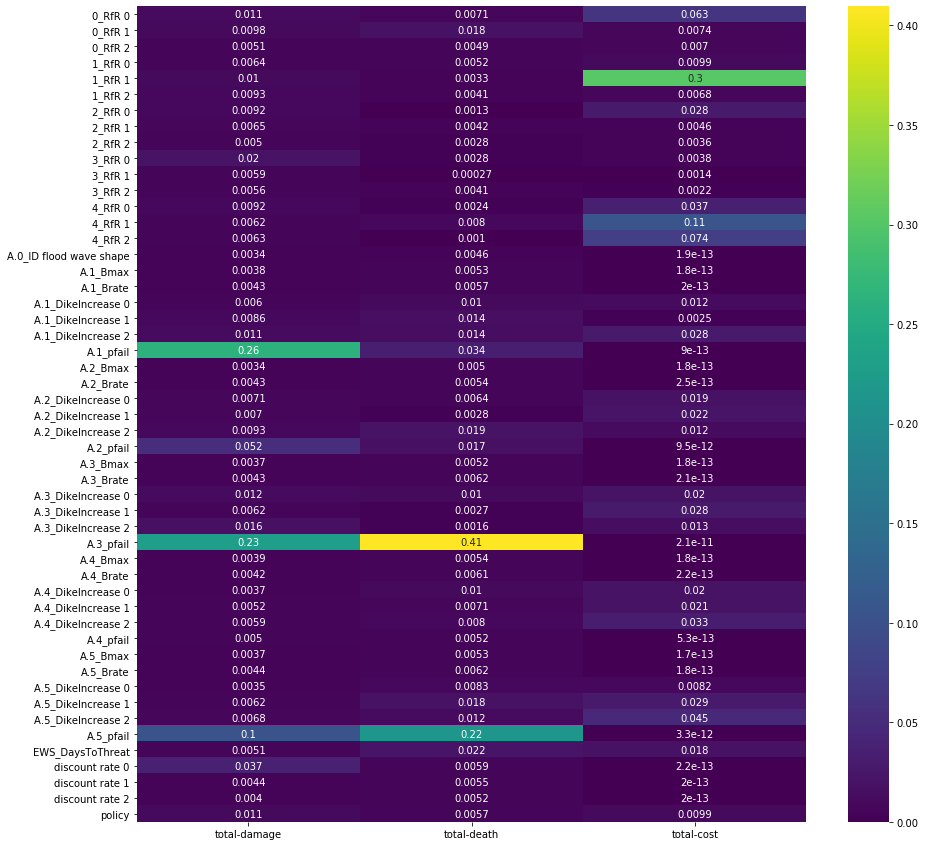

In [12]:
fs_r10 = feature_scoring.get_feature_scores_all(x_r10, data_r10)
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(fs_r10, cmap='viridis', annot=True)
plt.show()

###### * total damage is influened most the dike failure probabilities of A1, A3.
###### * The outcome of expected causalties is highly determined by the dike failure probabilities of A3, A5.
###### * Total costs of flood management (including investments in raise dikes,rfr and evacuation) are most influenced by the RfR levers at Cortenover (A.2) and Deventer (A.5).

### Demensional Stacking

##### Demensional Stacking is used to plot a heatmap of the influences of each lever/uncertainty has on the final outcome

In [15]:
dike_model, planning_steps = problem_definition('all vars')

In [32]:
x_ds = experiments_0.drop(columns = [u.name for u in dike_model.uncertainties]+['policy', 'model'],axis = 1, inplace = False)
y_ds = data_r10['total-damage']

In [34]:
dimensional_stacking.create_pivot_plot(x_ds,y_ds)
plt.show()

ValueError: Unknown label type: 'continuous'

To cont

### Sobol analysis

In [34]:
dike_model, planning_steps = problem_definition('all vars')
policies_0 = [Policy('no policy', **{l.name: 0 for l in dike_model.levers})]

n_scen = 2500
print(n_scen)
with MultiprocessingEvaluator(dike_model) as evalu:
    sa_results = evalu.perform_experiments(n_scen, policies=policies_0, uncertainty_sampling='sobol', reporting_interval=400)

from ema_workbench import save_results
save_results(sa_results, './sobolnopol4000scen.tar.gz')
# cant get this to run so i am running sobol.py

2500


[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


AttributeError: 'NoneType' object has no attribute 'sample'

In [70]:
all_results_sobol = load_results('./data/exp/sobolnopol40000scen.tar.gz')
experiments_sobol, outcomes_sobol = all_results_sobol

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/sobolnopol40000scen.tar.gz


In [71]:
data_r10 = pd.DataFrame.from_dict(outcomes_sobol)
dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Investment').columns
data_r10.drop(columns=invest_list, inplace=True)
rfr_list = data_r10.filter(like='RfR').columns
data_r10.drop(columns=rfr_list, inplace=True)
evac_list = data_r10.filter(like='Evacuation').columns
data_r10.drop(columns=evac_list, inplace=True)

In [72]:
problem = get_SALib_problem(dike_model.uncertainties)
Si_damage = sobol.analyze(problem, np.array(data_r10['total-damage']),
                   calc_second_order=True, print_to_console=False)
Si_death = sobol.analyze(problem, np.array(data_r10['total-death']),
                   calc_second_order=True, print_to_console=False)

In [73]:
Si_damage_filter = {k:Si_damage[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_damage_df = pd.DataFrame(Si_damage_filter, index = problem['names'])
# Si_damage_df

Si_death_filter = {k:Si_death[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_death_df = pd.DataFrame(Si_death_filter, index = problem['names'])

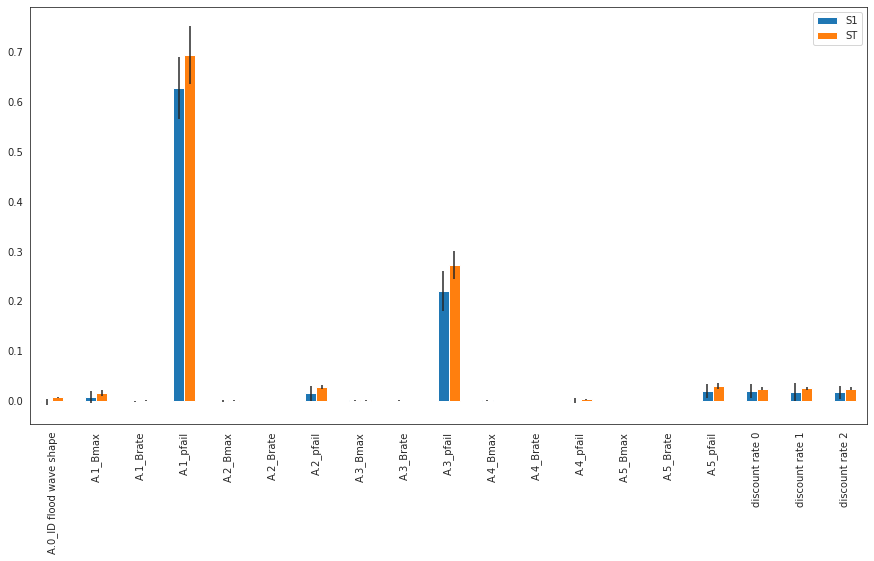

In [74]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_damage_df[['S1','ST']]
err = Si_damage_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

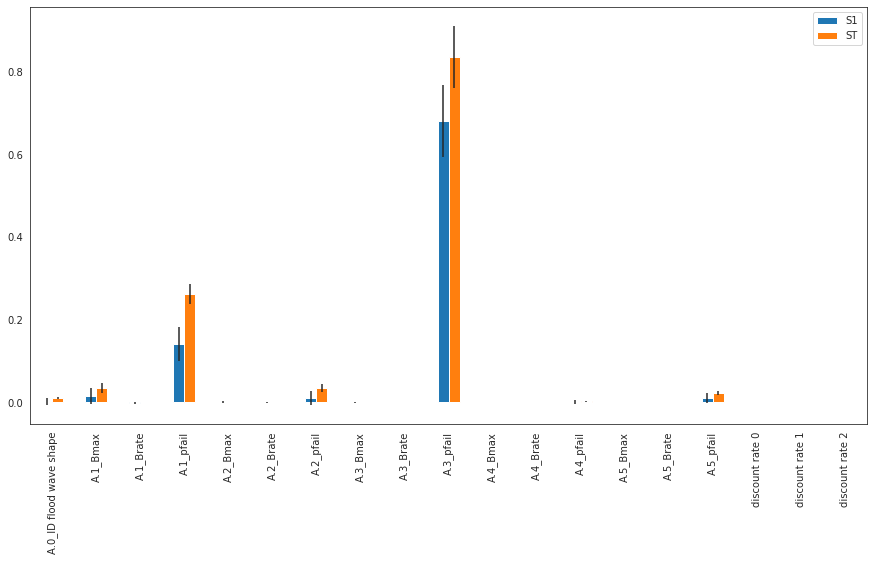

In [75]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_death_df[['S1','ST']]
err = Si_death_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [85]:
all_results_sobol_pol = load_results('./data/exp/sobolpol40000scen.tar.gz')
experiments_sobol_pol, outcomes_sobol_pol = all_results_sobol_pol

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/sobolpol40000scen.tar.gz


In [86]:
data_r10 = pd.DataFrame.from_dict(outcomes_sobol_pol)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Costs').columns
data_r10['total-cost'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)


In [87]:
levers = []
for lever in dike_model.levers:
    levers.append(lever)

In [88]:
# I know why this does not work; sobol requires an x amount of scenarios; thus differences in levers which it does not have here. Getting that sufficient is not yet possible for me. 
problem = get_SALib_problem(levers)
Si_damage = sobol.analyze(problem, np.array(data_r10['total-damage']),
                   calc_second_order=True, print_to_console=False)
Si_death = sobol.analyze(problem, np.array(data_r10['total-death']),
                   calc_second_order=True, print_to_console=False)
Si_cost = sobol.analyze(problem, np.array(data_r10['total-cost']),
                   calc_second_order=True, print_to_console=False)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [82]:
Si_damage_filter = {k:Si_damage[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_damage_df = pd.DataFrame(Si_damage_filter, index = problem['names'])
# Si_damage_df

Si_death_filter = {k:Si_death[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_death_df = pd.DataFrame(Si_death_filter, index = problem['names'])

Si_cost_filter = {k:Si_cost[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_cost_df = pd.DataFrame(Si_cost_filter, index = problem['names'])

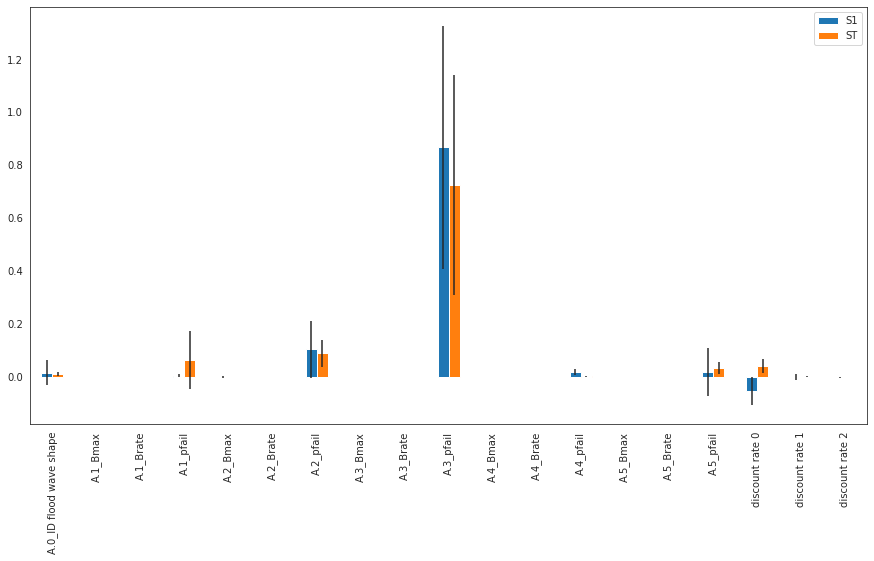

In [83]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_damage_df[['S1','ST']]
err = Si_damage_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

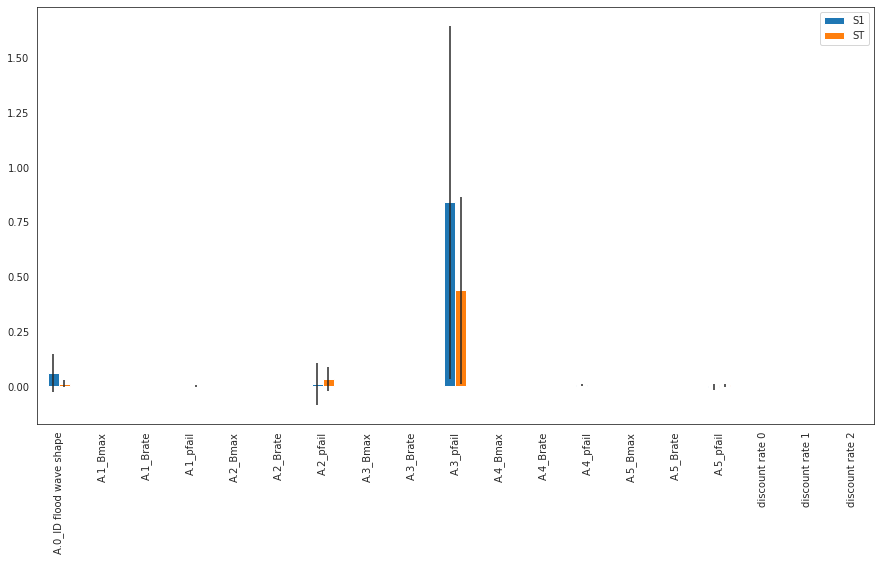

In [84]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_death_df[['S1','ST']]
err = Si_death_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [ ]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_cost_df[['S1','ST']]
err = Si_cost_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(15,10)
fig.subplots_adjust(bottom=0.3)
plt.show()

### optimization

In [10]:
model, planning_steps = problem_definition('damage, cost, deaths')

In [23]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 100000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = functools.partial(robustness, SMALLER, 150000000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS

robustness_funcs = {"Expected Number of Deaths": Expected_Number_of_Deaths,
                    "Expected Annual Damage": Expected_Annual_Damage,
                    "Total Investment Costs": Total_Investment_Costs}

MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]

n_scenarios = 5
scenarios = sample_uncertainties(model, n_scenarios)

In [24]:
nfe = 1000
BaseEvaluator.reporting_frequency = 0.1
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 1.1]),
              EpsilonProgress()]

epsilons=[1000,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] generation 0: 0/1000 nfe
Process ForkPoolWorker-152:
Process ForkPoolWorker-132:
Process ForkPoolWorker-129:
Process ForkPoolWorker-154:
Process ForkPoolWorker-151:
Process ForkPoolWorker-157:
Process ForkPoolWorker-159:
Process ForkPoolWorker-148:
Process ForkPoolWorker-146:
Process ForkPoolWorker-158:
Process ForkPoolWorker-134:
Process ForkPoolWorker-131:
Process ForkPoolWorker-133:
Process ForkPoolWorker-135:
Process ForkPoolWorker-141:
Process ForkPoolWorker-130:
Process ForkPoolWorker-145:
Process ForkPoolWorker-144:
Process ForkPoolWorker-160:
Process ForkPoolWorker-153:
Process ForkPoolWorker-138:
Process ForkPoolWorker-156:
Process ForkPoolWorker-147:
Process ForkPoolWorker-149:
Process ForkPoolWorker-155:


KeyboardInterrupt: 